# Tasca M7 T01





In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn import preprocessing
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')


ds = pd.read_csv('wineData.txt', sep=',', header=None)
df = pd.DataFrame(ds)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [2]:
df.columns = ['Types of wine','Alcohol','Malic acid','Ash', 'Alcalinity of ash','Magnesium','Total phenols', 'Flavanoids',
            'Nonflavanoid phenols','Proanthocyanins', 'Color intensity','Hue','OD280/OD315 of diluted wines',
            'Proline']
df

,Types of wine,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


**Información de los atributos:**

1) Types of wine : Clase Categorica del Vino ( Clase - 1 / 2 / 3).

2) Alcohol: Cantidad de Alcholol en ese tipo de vino.

3) Malic acid: Cantidad de ácido málico en ese tipo de vino.

4) Ash: Cantidad de Ceniza en ese tipo de vino.

5) Alcalinity of ash: Cantidad de Alcalinidad de la ceniza en ese tipo de vino.

6) Magnesium: Cantidad de Magnesio en ese tipo de vino.

7) Total phenols: Cantidad de fenol en ese tipo de vino.

8) Flavonoides: Cantidad de flavonoides en ese tipo de vino.

9) Nonflavanoid phenols: Cantidad de fenoles no flavonoides en ese tipo de vino.

10) Proantocianinas : Cantidad de Proantocianinas en ese tipo de vino.

11) Color intensity: Cantidad de intensidad de color para ese tipo de vino.

12) Hue: Cantidad de Matiz para ese tipo de vino.

13) OD280/OD315 of diluted wines: Cantidad de diluido en ese tipo de vino.

14) Proline : Cantidad de Prolina en ese tipo de vino.


Fuente [LINK](https://rpubs.com/Kanasani/724932)

<AxesSubplot:xlabel='Types of wine', ylabel='count'>

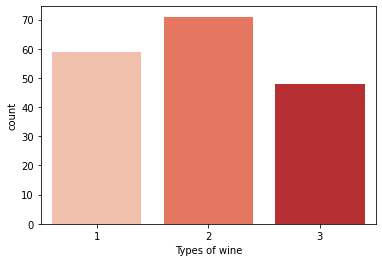

In [3]:
sns.countplot(data=df, x= 'Types of wine', palette='Reds')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Types of wine                 178 non-null    int64  
 1   Alcohol                       178 non-null    float64
 2   Malic acid                    178 non-null    float64
 3   Ash                           178 non-null    float64
 4   Alcalinity of ash             178 non-null    float64
 5   Magnesium                     178 non-null    int64  
 6   Total phenols                 178 non-null    float64
 7   Flavanoids                    178 non-null    float64
 8   Nonflavanoid phenols          178 non-null    float64
 9   Proanthocyanins               178 non-null    float64
 10  Color intensity               178 non-null    float64
 11  Hue                           178 non-null    float64
 12  OD280/OD315 of diluted wines  178 non-null    float64
 13  Proli

In [5]:
df.dtypes

Types of wine                     int64
Alcohol                         float64
Malic acid                      float64
Ash                             float64
Alcalinity of ash               float64
Magnesium                         int64
Total phenols                   float64
Flavanoids                      float64
Nonflavanoid phenols            float64
Proanthocyanins                 float64
Color intensity                 float64
Hue                             float64
OD280/OD315 of diluted wines    float64
Proline                           int64
dtype: object

- Se realizará un análisis descriptivo

In [6]:
def estadisticos_cont(num):
    #Calculamos describe
    estadisticos = num.describe().T
    #Añadimos la mediana
    estadisticos['median'] = num.median()
    #Reordenamos para que la mediana esté al lado de la media
    estadisticos = estadisticos.iloc[:,[0,1,8,2,3,4,5,6,7]]
    #Lo devolvemos
    return(estadisticos)

In [7]:
estadisticos_cont(df.select_dtypes('number'))

,count,mean,median,std,min,25%,50%,75%,max
Types of wine,178.0,1.938202,2.000,0.775035,1.00,1.0000,2.000,3.0000,3.00
Alcohol,178.0,13.000618,13.050,0.811827,11.03,12.3625,13.050,13.6775,14.83
Malic acid,178.0,2.336348,1.865,1.117146,0.74,1.6025,1.865,3.0825,5.80
Ash,178.0,2.366517,2.360,0.274344,1.36,2.2100,2.360,2.5575,3.23
Alcalinity of ash,178.0,19.494944,19.500,3.339564,10.60,17.2000,19.500,21.5000,30.00
Magnesium,178.0,99.741573,98.000,14.282484,70.00,88.0000,98.000,107.0000,162.00
Total phenols,178.0,2.295112,2.355,0.625851,0.98,1.7425,2.355,2.8000,3.88
Flavanoids,178.0,2.029270,2.135,0.998859,0.34,1.2050,2.135,2.8750,5.08
Nonflavanoid phenols,178.0,0.361854,0.340,0.124453,0.13,0.2700,0.340,0.4375,0.66
Proanthocyanins,178.0,1.590899,1.555,0.572359,0.41,1.2500,1.555,1.9500,3.58


- Se analizará si hay registros NaN y nulos. 

In [8]:
df.isna().sum().sort_values(ascending = False)

Types of wine                   0
Alcohol                         0
Malic acid                      0
Ash                             0
Alcalinity of ash               0
Magnesium                       0
Total phenols                   0
Flavanoids                      0
Nonflavanoid phenols            0
Proanthocyanins                 0
Color intensity                 0
Hue                             0
OD280/OD315 of diluted wines    0
Proline                         0
dtype: int64

In [9]:
df.isnull().sum().sort_values(ascending = False)

Types of wine                   0
Alcohol                         0
Malic acid                      0
Ash                             0
Alcalinity of ash               0
Magnesium                       0
Total phenols                   0
Flavanoids                      0
Nonflavanoid phenols            0
Proanthocyanins                 0
Color intensity                 0
Hue                             0
OD280/OD315 of diluted wines    0
Proline                         0
dtype: int64

<Figure size 432x288 with 0 Axes>

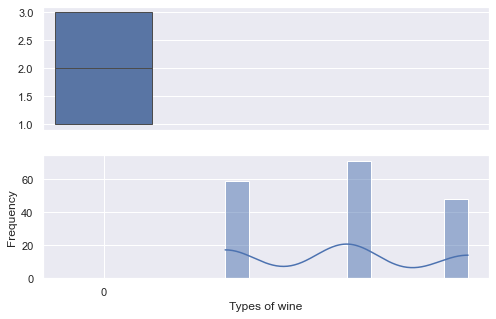

<Figure size 576x360 with 0 Axes>

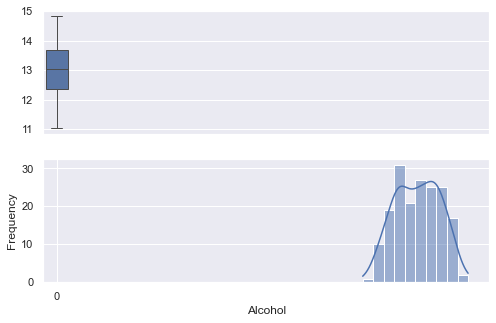

<Figure size 576x360 with 0 Axes>

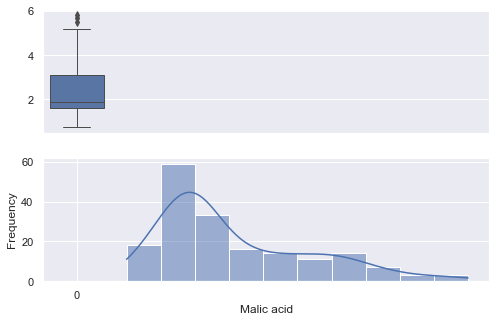

<Figure size 576x360 with 0 Axes>

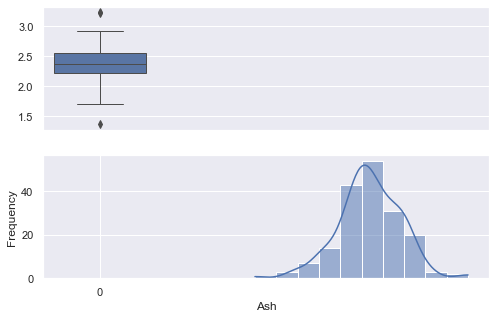

<Figure size 576x360 with 0 Axes>

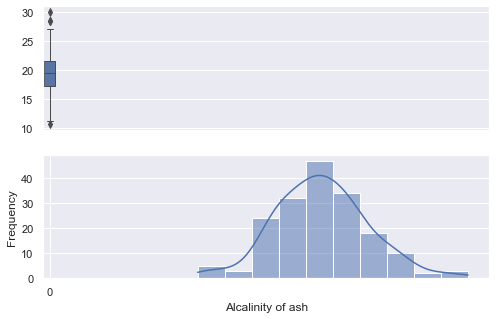

<Figure size 576x360 with 0 Axes>

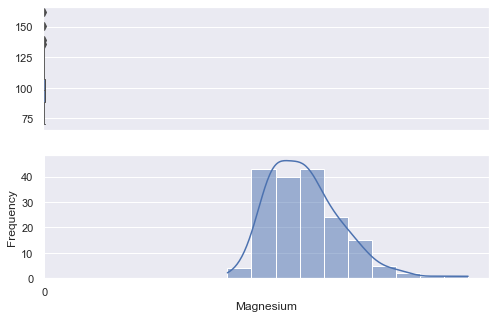

<Figure size 576x360 with 0 Axes>

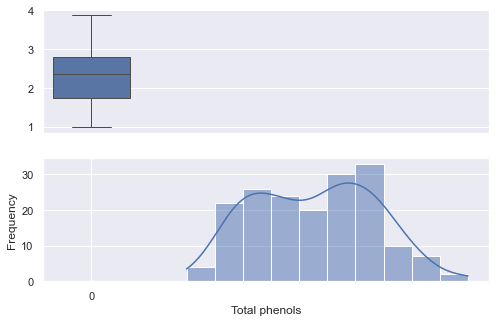

<Figure size 576x360 with 0 Axes>

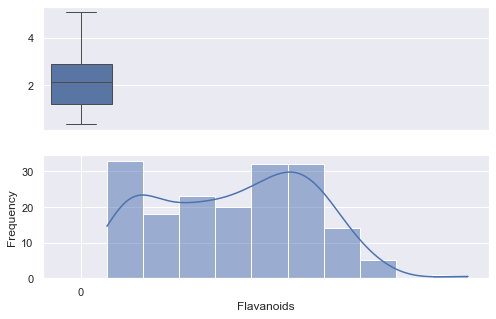

<Figure size 576x360 with 0 Axes>

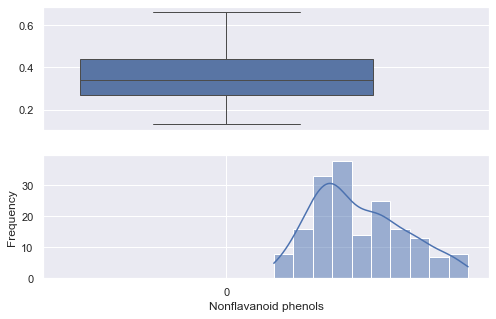

<Figure size 576x360 with 0 Axes>

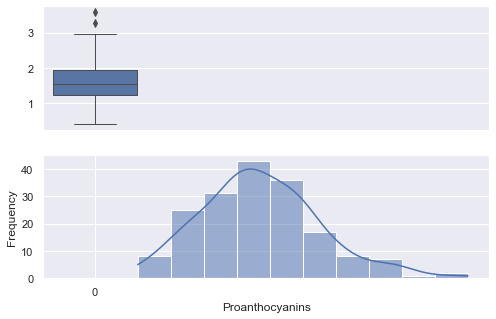

<Figure size 576x360 with 0 Axes>

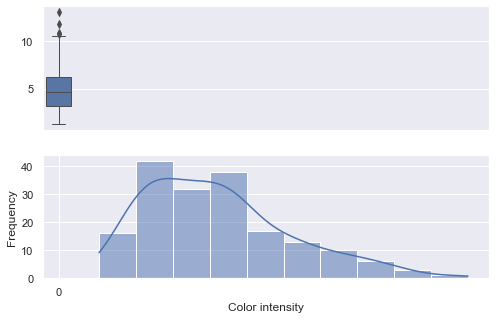

<Figure size 576x360 with 0 Axes>

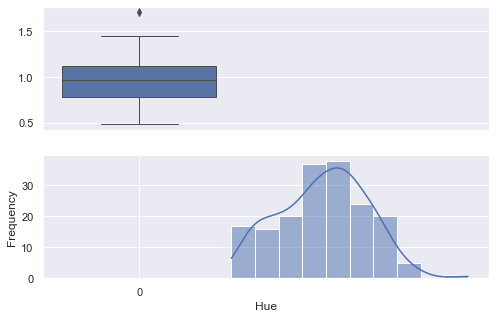

<Figure size 576x360 with 0 Axes>

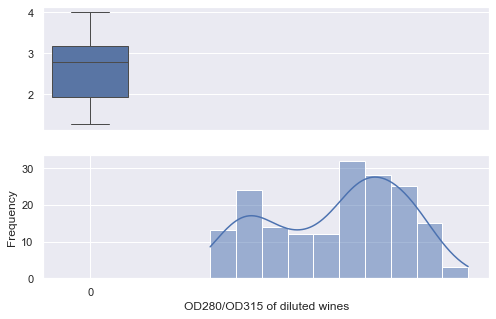

<Figure size 576x360 with 0 Axes>

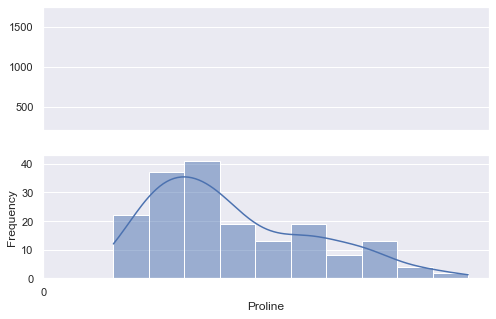

In [10]:
for i in df.columns:
    plt.figure()
    plt.tight_layout()
    sns.set(rc={"figure.figsize":(8, 5)})
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True)
    plt.gca().set(xlabel= i,ylabel='Frequency')
    sns.boxplot(df[i],  ax=ax_box , linewidth= 1.0)
    sns.histplot(df[i], ax=ax_hist , bins = 10,kde=True)

- Se realizará el cálculo de correlación entre las distintas variables del DataFrame, luego se graficará.

In [11]:
corr = df.corr()
corr.shape

(14, 14)

<AxesSubplot:>

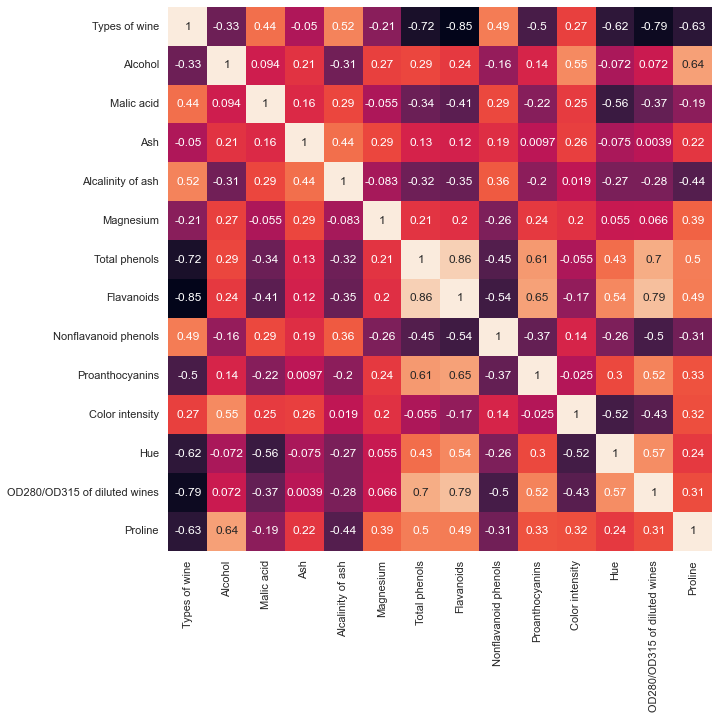

In [12]:
plt.figure(figsize=(10,10))
sns.heatmap(corr, cbar=False, square= True, annot=True)

En el gráfico se observa:

- una correlación positiva de alta intensidad entre las variables "Total phenols" (cantidad de fenol en ese tipo de vino) y "Flavonoides" (cantidad de flavonoides en ese tipo de vino).
- una correlación negativa de mediana intensidad entre "Flavonoides" (cantidad de flavonoides en ese tipo de vino) y "Nonflavanoid phenols"(cantidad de fenoles no flavonoides en ese tipo de vino).
- una correlación negativa de mediana intensidad entre " Alcalinity of ash" (cantidad de Alcalinidad de la ceniza en ese tipo de vino) y "Ash" (cantidad de ceniza en ese tipo de vino).
- una correlación positiva de mediana intensidad entre las variables "Hue" (cantidad de Matiz para ese tipo de vino) y "OD280/OD315 of diluted wines" (cantidad de diluido en ese tipo de vino).

## Exercici 5
Aplica algun procés d'enginyeria per millorar els resultats (normalització, estandardització, mostreig...)

### Preprocesado
- Se realizará el preprocesado del DataSet para transformar los datos.
- Se utilizará el Test de Shapiro para conocer si los datos tienen distribución normal. 

In [13]:
from scipy import stats

print('Hipotesis nula (Ho): La muestra tiene una distribución normal (Probablemente Gaussiana).')
print('Hipotesis alternativa (H1): La muestra no tiene una distribución normal (Probablemente no Gaussiana).\n')

for i in df.columns:
    shapiro_test = stats.shapiro(df[i])
    print('La variable', i, 'tiene un p-value= ', shapiro_test.pvalue)
    if shapiro_test.pvalue>0.05:
        print('Se acepta la hipotesis nula, la muestra tiene una distribución normal (Probablemente Gaussiana).\n')
    else:
        print('Se rechaza la hipotesis nula, la muestra no tiene una distribución normal (Probablemente no Gaussiana).\n')

Hipotesis nula (Ho): La muestra tiene una distribución normal (Probablemente Gaussiana).
Hipotesis alternativa (H1): La muestra no tiene una distribución normal (Probablemente no Gaussiana).

La variable Types of wine tiene un p-value=  3.526998097335039e-14
Se rechaza la hipotesis nula, la muestra no tiene una distribución normal (Probablemente no Gaussiana).

La variable Alcohol tiene un p-value=  0.02005171775817871
Se rechaza la hipotesis nula, la muestra no tiene una distribución normal (Probablemente no Gaussiana).

La variable Malic acid tiene un p-value=  2.9459296113643063e-10
Se rechaza la hipotesis nula, la muestra no tiene una distribución normal (Probablemente no Gaussiana).

La variable Ash tiene un p-value=  0.03868526220321655
Se rechaza la hipotesis nula, la muestra no tiene una distribución normal (Probablemente no Gaussiana).

La variable Alcalinity of ash tiene un p-value=  0.26386943459510803
Se acepta la hipotesis nula, la muestra tiene una distribución normal (Pr

**Pre pocesamiento de los datos**

- la columna:  "Alcalinity of ash tiene una distribución normal, por lo tanto se les realizará estandarización
- las comunnas : "Malic acid", "Ash", "Magnesium", "Proanthocyanins", "Color intensity", "Hue" tienen outliers, por lo que se les realizará RobustScaler 
- las columnas : "Alcohol", "Total phenols", "Flavanoids", "Nonflavanoid phenols", "OD280/OD315 of diluted wines", "Proline", no tienen distribución normal, por lo que se les realizará normalización. 


Se realizará una copia de DataFrame para poder realizar la transformación de los datos.

In [14]:
df_pre = df.copy()
df_pre.head()

,Types of wine,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


- Se realizará **Estandarización** a la única variable que tiene distribución normal.

In [15]:
#Estandarización para la columna con distribución normal
estand_col = ['Alcalinity of ash']
scaler_Stand = preprocessing.StandardScaler().fit(df[estand_col])
df[estand_col] = scaler_Stand.transform(df[estand_col])

df_pre.head()

,Types of wine,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


- Se realizará **RobustScaler** a aquellas variables que tiene outliers.

In [16]:
#RobustScaler para las variables con outliers
robust_col = ['Malic acid', 'Ash', 'Magnesium', 'Proanthocyanins', 'Color intensity', 'Hue']
Robust_scaler = preprocessing.RobustScaler().fit(df_pre[robust_col])
df_pre[robust_col] = Robust_scaler.transform(df_pre[robust_col])


df_pre.head()

,Types of wine,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,-0.104730,0.201439,15.6,1.526316,2.80,3.06,0.28,1.050000,0.318792,0.222222,3.92,1065
1,1,13.20,-0.057432,-0.633094,11.2,0.105263,2.65,2.76,0.26,-0.392857,-0.104027,0.251852,3.40,1050
2,1,13.16,0.334459,0.892086,18.6,0.157895,2.80,3.24,0.30,1.792857,0.332215,0.192593,3.17,1185
3,1,14.37,0.057432,0.402878,16.8,0.789474,3.85,3.49,0.24,0.892857,1.043624,-0.311111,3.45,1480
4,1,13.24,0.489865,1.467626,21.0,1.052632,2.80,2.69,0.39,0.378571,-0.124161,0.222222,2.93,735


- Se realizará **Normalización** a aquellas variables que no tienen distribución normal. 

In [17]:
#Normalización para las variables que no tienen distribución normal
norm_col = ['Alcohol', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols', 'OD280/OD315 of diluted wines', 'Proline']
norm_scaler = preprocessing.MinMaxScaler().fit(df_pre[norm_col])
df_pre[norm_col] = norm_scaler.transform(df_pre[norm_col])

df_pre.head()

,Types of wine,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,0.842105,-0.104730,0.201439,15.6,1.526316,0.627586,0.573840,0.283019,1.050000,0.318792,0.222222,0.970696,0.561341
1,1,0.571053,-0.057432,-0.633094,11.2,0.105263,0.575862,0.510549,0.245283,-0.392857,-0.104027,0.251852,0.780220,0.550642
2,1,0.560526,0.334459,0.892086,18.6,0.157895,0.627586,0.611814,0.320755,1.792857,0.332215,0.192593,0.695971,0.646933
3,1,0.878947,0.057432,0.402878,16.8,0.789474,0.989655,0.664557,0.207547,0.892857,1.043624,-0.311111,0.798535,0.857347
4,1,0.581579,0.489865,1.467626,21.0,1.052632,0.627586,0.495781,0.490566,0.378571,-0.124161,0.222222,0.608059,0.325963


<Figure size 576x360 with 0 Axes>

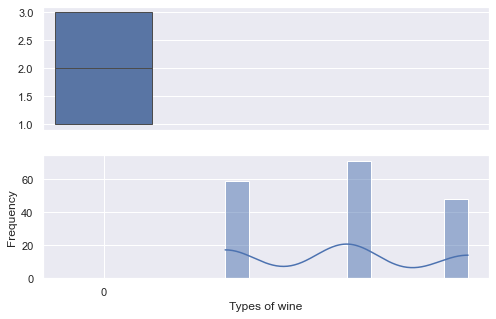

<Figure size 576x360 with 0 Axes>

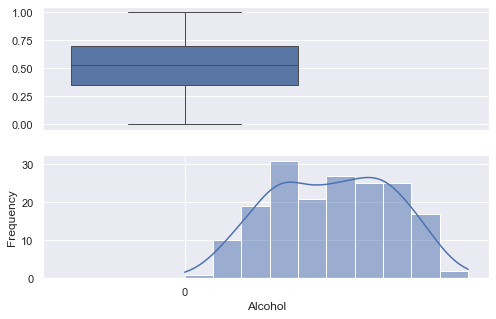

<Figure size 576x360 with 0 Axes>

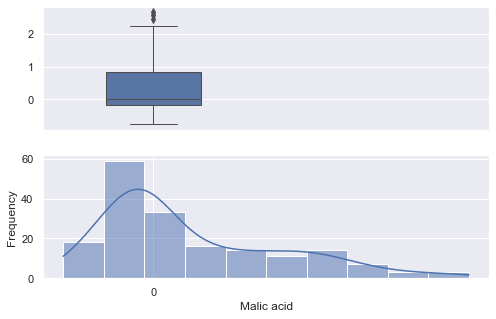

<Figure size 576x360 with 0 Axes>

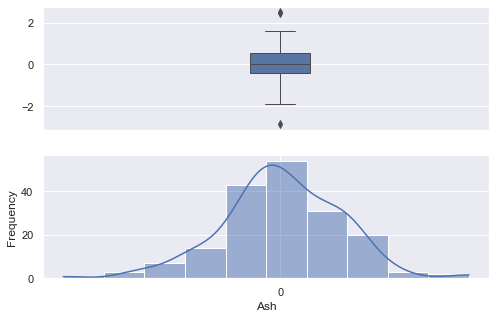

<Figure size 576x360 with 0 Axes>

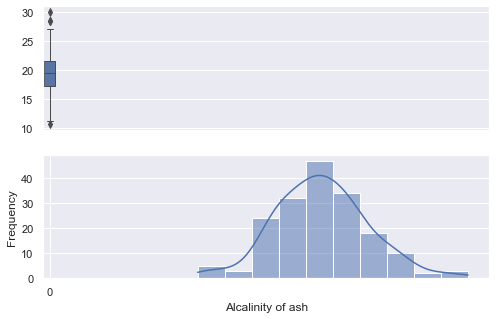

<Figure size 576x360 with 0 Axes>

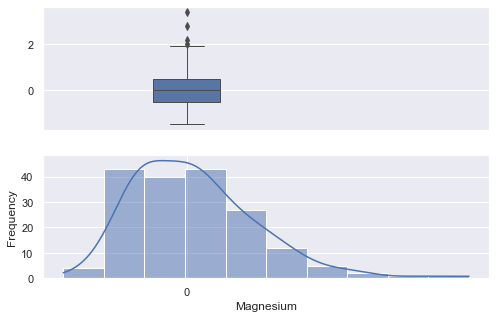

<Figure size 576x360 with 0 Axes>

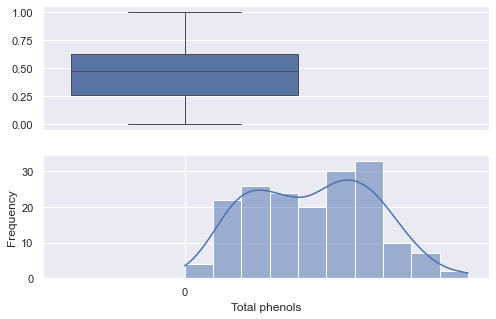

<Figure size 576x360 with 0 Axes>

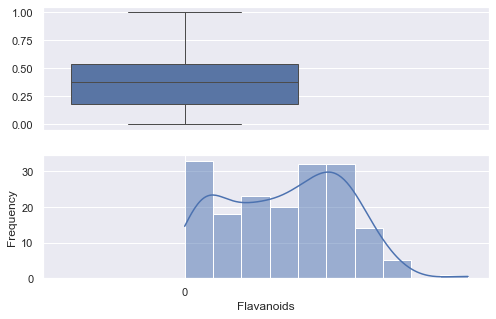

<Figure size 576x360 with 0 Axes>

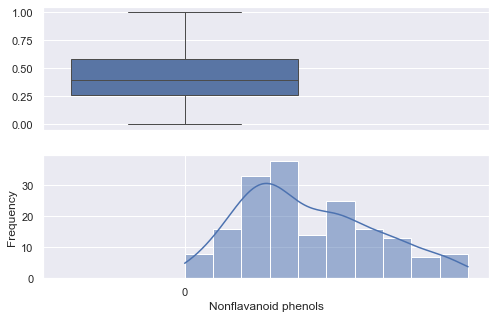

<Figure size 576x360 with 0 Axes>

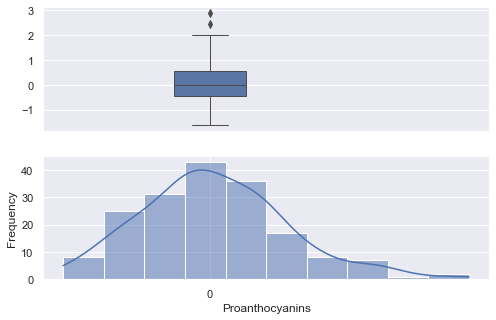

<Figure size 576x360 with 0 Axes>

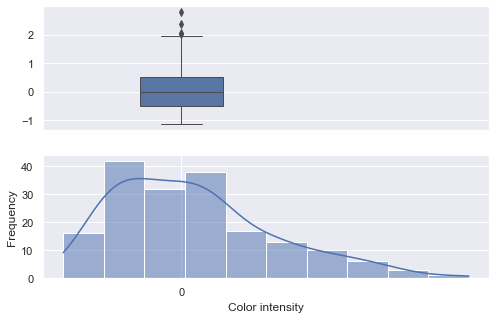

<Figure size 576x360 with 0 Axes>

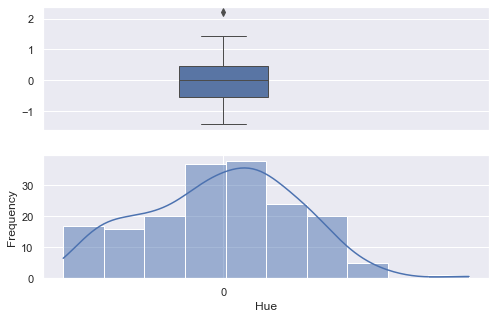

<Figure size 576x360 with 0 Axes>

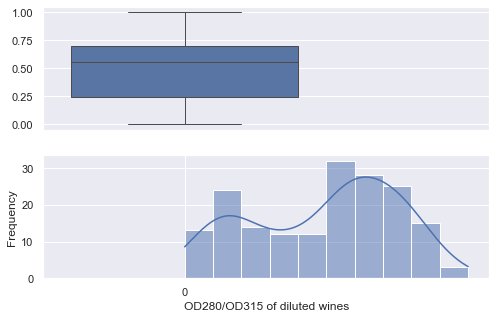

<Figure size 576x360 with 0 Axes>

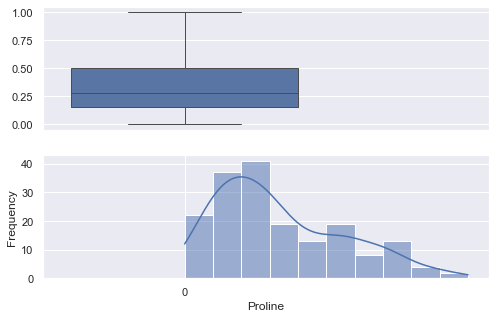

In [18]:
for i in df_pre.columns:
    plt.figure()
    plt.tight_layout()
    sns.set(rc={"figure.figsize":(8, 5)})
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True)
    plt.gca().set(xlabel= i,ylabel='Frequency')
    sns.boxplot(df_pre[i],  ax=ax_box , linewidth= 1.0)
    sns.histplot(df_pre[i], ax=ax_hist , bins = 10,kde=True)

In [19]:
def estadisticos_cont(num):
    #Calculamos describe
    estadisticos = num.describe().T
    #Añadimos la mediana
    estadisticos['median'] = num.median()
    #Reordenamos para que la mediana esté al lado de la media
    estadisticos = estadisticos.iloc[:,[0,1,8,2,3,4,5,6,7]]
    #Lo devolvemos
    return(estadisticos)

In [20]:
estadisticos_cont(df_pre.select_dtypes('number'))

,count,mean,median,std,min,25%,50%,75%,max
Types of wine,178.0,1.938202,2.000000e+00,0.775035,1.000000,1.000000,2.000000e+00,3.000000,3.000000
Alcohol,178.0,0.518584,5.315789e-01,0.213639,0.000000,0.350658,5.315789e-01,0.696711,1.000000
Malic acid,178.0,0.318479,-7.502679e-17,0.754828,-0.760135,-0.177365,-7.502679e-17,0.822635,2.658784
Ash,178.0,0.018754,0.000000e+00,0.789479,-2.877698,-0.431655,0.000000e+00,0.568345,2.503597
Alcalinity of ash,178.0,19.494944,1.950000e+01,3.339564,10.600000,17.200000,1.950000e+01,21.500000,30.000000
Magnesium,178.0,0.091662,0.000000e+00,0.751710,-1.473684,-0.526316,0.000000e+00,0.473684,3.368421
Total phenols,178.0,0.453487,4.741379e-01,0.215811,0.000000,0.262931,4.741379e-01,0.627586,1.000000
Flavanoids,178.0,0.356386,3.786920e-01,0.210730,0.000000,0.182489,3.786920e-01,0.534810,1.000000
Nonflavanoid phenols,178.0,0.437460,3.962264e-01,0.234818,0.000000,0.264151,3.962264e-01,0.580189,1.000000
Proanthocyanins,178.0,0.051284,-1.587272e-16,0.817656,-1.635714,-0.435714,-1.587272e-16,0.564286,2.892857


- Se realizará una copia del DataFrame transformado listo para hacer Machine Learning

In [21]:
df_ml = df_pre.copy()

- Se realizará la división del DataFrame en Features y Target.
- El Target será la columna "Types of wine": Clase Categorica del Vino ( Clase - 1 / 2 / 3).
- Se realizará la división del DataFrame en dos sets: Training y Data (Train Test Split). La división será del 80% para el Train y 20% para el Test.

In [22]:
from sklearn.model_selection import train_test_split

X = df_ml.drop(['Types of wine'],axis=1)
y = df_ml[['Types of wine']]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, train_size = 0.80)

print("Shape X_train:", X_train.shape, "\nShape X_test:", X_test.shape, 
      "\nShape y_train:", y_train.shape, "\nShape y_test:",y_test.shape)

Shape X_train: (142, 13) 
Shape X_test: (36, 13) 
Shape y_train: (142, 1) 
Shape y_test: (36, 1)


## Exercici 1
Crea almenys dos models de classificació diferents per intentar predir el millor les classes de l'arxiu adjunt.

- Se eligirán los siguientes modelos:  Logistic regression, K-Nearest Neighbors (KNN) y  Support Vector Machines (SVM)

### Logistic Regression

Se elegirá el modelo de **Regresión Logística** 

In [23]:
# Logistic regression
from sklearn.linear_model import LogisticRegression

#Instanciar
log_reg = LogisticRegression(random_state=42)

#Entrenar
log_reg.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [24]:
y_pred_lor_reg = log_reg.predict(X_test)

y_pred_lor_reg

array([1, 3, 2, 1, 2, 3, 1, 3, 2, 2, 3, 3, 1, 2, 3, 2, 1, 1, 3, 1, 2, 1,
       1, 2, 2, 2, 2, 2, 1, 3, 1, 1, 2, 1, 1, 1], dtype=int64)

 ### K-Nearest Neighbors (KNN)
 
 Se elegirá el modelo de **K-Vecinos más cercanos** 

In [25]:
#K-Nearest Neighbors (KNN)
from sklearn.neighbors import KNeighborsClassifier

#Instanciar
KNN = KNeighborsClassifier()

#Entrenar
KNN.fit(X_train, y_train)


KNeighborsClassifier()

In [26]:
y_pred_KNN = KNN.predict(X_test)

y_pred_KNN

array([1, 3, 2, 1, 3, 2, 1, 3, 2, 2, 3, 3, 1, 2, 3, 2, 1, 1, 2, 1, 1, 2,
       1, 2, 1, 2, 2, 2, 1, 3, 1, 1, 2, 1, 1, 1], dtype=int64)

### Support Vector Machines (SVM)

Se elegirá el modelo de **Máquinas de Vectores de Soporte**

In [27]:
#Support Vector Machines (SVM)
from sklearn import svm

#Instanciar
SVM = svm.SVC(kernel='linear') 

#Entrenar
SVM.fit(X_train, y_train)

SVC(kernel='linear')

In [28]:
y_pred_SVM = SVM.predict(X_test)

y_pred_KNN

array([1, 3, 2, 1, 3, 2, 1, 3, 2, 2, 3, 3, 1, 2, 3, 2, 1, 1, 2, 1, 1, 2,
       1, 2, 1, 2, 2, 2, 1, 3, 1, 1, 2, 1, 1, 1], dtype=int64)

## Exercici 2
Compara els models de classificació utilitzant la precisió (accuracy), una matriu de confusió i d’altres mètriques més avançades.

- Se comparará los modelos mediante la **Accuracy** (precisión). 


In [29]:
acc_log_reg = log_reg.score(X_test, y_test)
acc_KNN = KNN.score(X_test, y_test)
acc_SVM = SVM.score(X_test, y_test)

#acc_log_reg = "{:.2f}".format(acc_log_reg)
#acc_KNN = "{:.2f}".format(acc_KNN)
#acc_SVM = "{:.2f}".format(acc_SVM)


metrics = pd.DataFrame( data = [['Logistic Regression', acc_log_reg],
                                ['KNN', acc_KNN],
                                [ 'SVM', acc_SVM]],
                                 columns = ['Modelo', 'Accuracy'])
metrics.head()

,Modelo,Accuracy
0,Logistic Regression,0.916667
1,KNN,0.861111
2,SVM,0.916667


-Se observa que los modelos elegidos tienen un buen "ACCURACY". 
- El modelo "Logistic Regression" tiene un Accuracy del 92%.
- El modelo "KNN" tiene un Accuracy del 86%.
- El modelo "SMV" tiene un Acurracy del 92%


**Matriz de confusión modelo Logistic Regression**

In [30]:
from sklearn.metrics import confusion_matrix
MC_log_reg = confusion_matrix (y_test, y_pred_lor_reg)
MC_KNN = confusion_matrix (y_test, y_pred_KNN)
MC_SVM = confusion_matrix (y_test, y_pred_SVM)

[Text(0.5, 1.0, 'Matriz de confusión: Logistic Regression')]

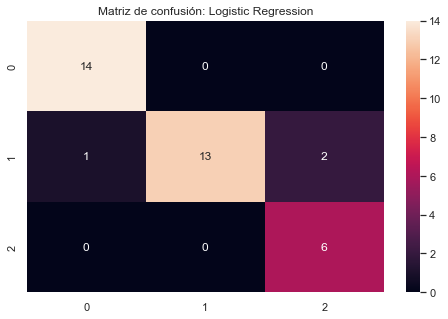

In [64]:
sns.heatmap(MC_log_reg, annot=True).set(title='Matriz de confusión: Logistic Regression')

- El modelo "Logistic Regression", predice como falsos negativos valores de las clases 2 y 3.

**Matriz de confusión modelo KNN**

[Text(0.5, 1.0, 'Matriz de confusión: KNN')]

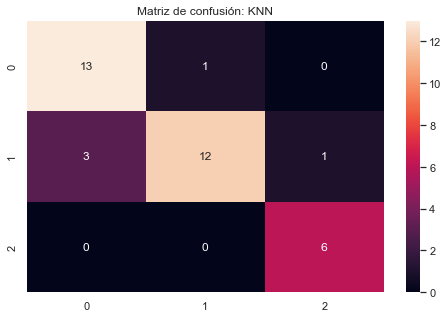

In [32]:
sns.heatmap(MC_KNN, annot=True).set(title='Matriz de confusión: KNN')

- El modelo "KNN", predice como falsos negativos valores para las clases 1 y 2.

**Matriz de confusión modelo SVM**

[Text(0.5, 1.0, 'Matriz de confusión: SVM')]

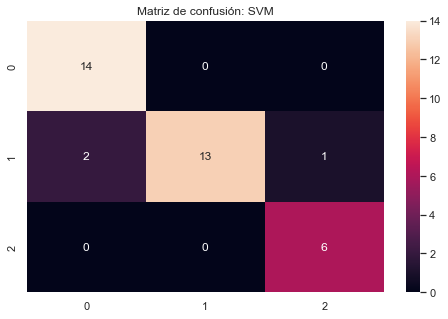

In [33]:
sns.heatmap(MC_SVM, annot=True).set(title='Matriz de confusión: SVM')

- El modelo "SVM", predice valores como falsos negativos apenas para la clase 2, a los otros los predice correctamente.

**F1 Score**

In [34]:
from sklearn.metrics import f1_score

f1_log_reg = f1_score(y_test, y_pred_lor_reg, average='macro')
f1_KNN = f1_score(y_test, y_pred_KNN, average='macro')
f1_SVM = f1_score(y_test, y_pred_SVM, average='macro')

#f1_log_reg = "{:.2f}".format(f1_log_reg)
#f1_KNN = "{:.2f}".format(f1_KNN)
#f1_SVM = "{:.2f}".format(f1_SVM)


metrics = pd.DataFrame( data = [['Logistic Regression', acc_log_reg, f1_log_reg],
                                ['KNN', acc_KNN, f1_KNN],
                                [ 'SVM', acc_SVM, f1_SVM]],
                       columns = ['Modelo', 'Accuracy', 'F1'])
metrics

,Modelo,Accuracy,F1
0,Logistic Regression,0.916667,0.906404
1,KNN,0.861111,0.872443
2,SVM,0.916667,0.917654


- F1 Score, representan el porcentaje (%) de predicciones positivas correctas. 
- Los resultados obtenidos son muy similares al accuracy de cada modelo.
- Se observa que el valor de F1  en el modelo "Logistic Regression" disminuye levemente en comparación con el accuracy,en los modelos "KNN" y "SVM" aumenta levemente.

## Exercici 3
Entrena’ls usant els diferents paràmetres que admeten per tal de millorar-ne la predicció.


### Se buscará mejorar los parámetros del método "Logistic Regression"

In [36]:
#Instanciar
log_reg_bp = LogisticRegression()


#Entrenar
log_reg_bp.fit(X_train,y_train)

y_pred_log_reg_bp = log_reg_bp.predict(X_test) 

#parametros de Logistic Regression
log_reg_bp.get_params().keys()

dict_keys(['C', 'class_weight', 'dual', 'fit_intercept', 'intercept_scaling', 'l1_ratio', 'max_iter', 'multi_class', 'n_jobs', 'penalty', 'random_state', 'solver', 'tol', 'verbose', 'warm_start'])

In [37]:
from pprint import pprint

#Parámetros actualmente en uso
print('Parámetros actualmente en uso:\n')
pprint(log_reg_bp.get_params())

Parámetros actualmente en uso:

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}


In [38]:
#Parameter search
from sklearn.model_selection import GridSearchCV

#param_grid: 
    #lista de diccionarios con nombres de parámetros (str)
param_grid = dict()
param_grid['solver'] = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
param_grid['penalty'] = ["l1", "l2", "elasticnet"]

# cross validator (cv): 
    # Para integer/None inputs si el estimador es un clasificador y es binario o multiclase, se usa StratifiedKFold.
    #En todos los demás casos, se usa KFold, por defecto cv = 5.
   
search = GridSearchCV(log_reg_bp, param_grid, scoring = 'f1_macro')

search.fit(X_train, y_train)

print("Mejores Hyper-parameters: ", search.best_params_)

Mejores Hyper-parameters:  {'penalty': 'l1', 'solver': 'liblinear'}


In [39]:
acc_log_reg_bp = log_reg_bp.score(X_test, y_test)
f1_log_reg_bp = f1_score(y_test, y_pred_log_reg_bp, average='macro')

print ('Accuracy: %.3f' % acc_log_reg_bp, '\nF1 Score: %.3f' % f1_log_reg_bp)

Accuracy: 0.917 
F1 Score: 0.906


In [40]:
metrics = pd.DataFrame( data =  [['Logistic Regression', acc_log_reg, f1_log_reg],
                                ['Logistic Regression BP', acc_log_reg_bp, f1_log_reg_bp], 
                                ['KNN', acc_KNN, f1_KNN],
                                ['SVM', acc_SVM, f1_SVM]],                             
                       columns = ['Modelo', 'Accuracy', 'F1'])
metrics

,Modelo,Accuracy,F1
0,Logistic Regression,0.916667,0.906404
1,Logistic Regression BP,0.916667,0.906404
2,KNN,0.861111,0.872443
3,SVM,0.916667,0.917654


- No se observan diferencias en las métricas del modelo "Logistic Regression" con y sin la mejora de parámetros.

###  Se buscará mejorar los parámetros del modelo "KNN"

In [62]:
from sklearn.metrics import f1_score

f1s = []

#Cálculo de f1 score para valores K entre 1 y 40
for i in range(1, 40):
    KNN_bp = KNeighborsClassifier(n_neighbors=i)
    
    KNN_bp.fit(X_train, y_train)
    
    y_pred_KNN_bp = KNN_bp.predict(X_test)
    
    # usando promedio = 'ponderado' para calcular un promedio ponderado para las 4 clases
    f1s.append(f1_score(y_test, y_pred_KNN_bp, average='weighted'))

Text(0, 0.5, 'F1 Score')

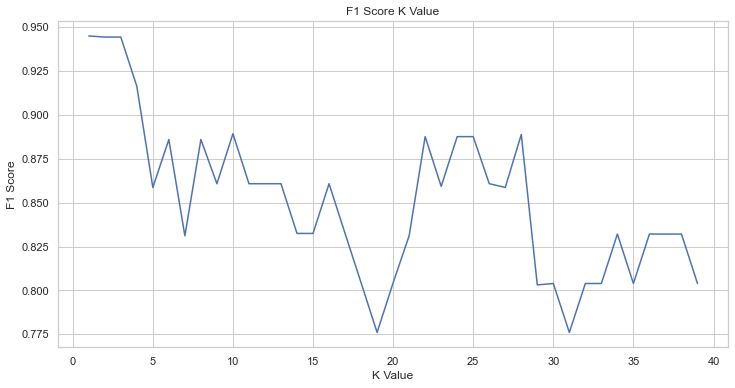

In [63]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), f1s)
plt.title('F1 Score K Value')
plt.xlabel('K Value')
plt.ylabel('F1 Score')

In [42]:
KNN_bp = KNeighborsClassifier(n_neighbors=3)

KNN_bp.fit(X_train, y_train)

y_pred_KNN_bp = KNN_bp.predict(X_test)

acc_KNN_bp = KNN_bp.score(X_test, y_test)

#acc_KNN_bp = "{:.2f}".format(acc_KNN_bp)


acc_KNN_bp

0.9444444444444444

In [43]:
f1_KNN_bp = f1_score(y_test, y_pred_KNN_bp, average='macro')

#f1_KNN_bp = "{:.2f}".format(f1_KNN_bp)

f1_KNN_bp

0.9553571428571429

In [44]:
metrics = pd.DataFrame( data =  [['Logistic Regression', acc_log_reg, f1_log_reg],
                                ['Logistic Regression BP', acc_log_reg_bp, f1_log_reg_bp], 
                                ['KNN', acc_KNN, f1_KNN],
                                ['KNN BP', acc_KNN_bp, f1_KNN_bp],
                                ['SVM', acc_SVM, f1_SVM]],                             
                       columns = ['Modelo', 'Accuracy', 'F1'])
metrics

,Modelo,Accuracy,F1
0,Logistic Regression,0.916667,0.906404
1,Logistic Regression BP,0.916667,0.906404
2,KNN,0.861111,0.872443
3,KNN BP,0.944444,0.955357
4,SVM,0.916667,0.917654


- Se observan considerables aumentos en las métricas del modelo "KNN" con la mejoras de parámetros.


### Se buscará mejorar los parámetros del modelo "SMV"

In [45]:
from pprint import pprint


#Instanciar
SVM_bp = svm.SVC(kernel='linear') 

#Entrenar
SVM_bp.fit(X_train, y_train)

# ver los Parámetros actualmente en uso
print('Parámetros actualmente en uso:\n')
pprint(SVM_bp.get_params())

Parámetros actualmente en uso:

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'linear',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}


In [46]:
from sklearn.model_selection import GridSearchCV
#Hyperparamter tuning using Gridsearch

param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf','linear']}
SVM_bp = GridSearchCV(SVM,param_grid)

#Fitting the model
SVM_bp.fit(X_train,y_train)

GridSearchCV(estimator=SVC(kernel='linear'),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf', 'linear']})

In [47]:
y_pred_SVM_bp = SVM_bp.predict(X_test)

acc_SVM_bp = SVM_bp.score(X_test, y_test)

#acc_SVM_bp = "{:.2f}".format(acc_SVM_bp)

acc_SVM_bp

0.9722222222222222

In [48]:
f1_SVM_bp = f1_score(y_test, y_pred_SVM_bp, average='macro')

#f1_SVM_bp = "{:.2f}".format(f1_SVM_)bp

f1_SVM_bp

0.9636062861869313

In [49]:
metrics = pd.DataFrame( data =  [['Logistic Regression', acc_log_reg, f1_log_reg],
                                ['Logistic Regression BP', acc_log_reg_bp, f1_log_reg_bp], 
                                ['KNN', acc_KNN, f1_KNN],
                                ['KNN BP', acc_KNN_bp, f1_KNN_bp],
                                ['SVM', acc_SVM, f1_SVM],
                                ['SVM BP', acc_SVM_bp, f1_SVM_bp]],                                
                       columns = ['Modelo', 'Accuracy', 'F1'])
metrics

,Modelo,Accuracy,F1
0,Logistic Regression,0.916667,0.906404
1,Logistic Regression BP,0.916667,0.906404
2,KNN,0.861111,0.872443
3,KNN BP,0.944444,0.955357
4,SVM,0.916667,0.917654
5,SVM BP,0.972222,0.963606


- Se observan considerables aumentos en las métricas del modelo "SVM" con la mejoras de parámetros.

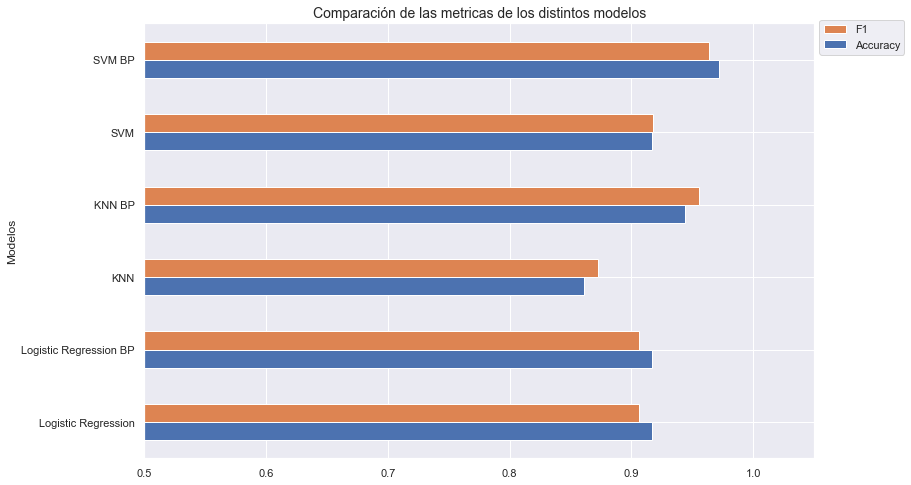

In [50]:
plot_metrics = metrics.set_index('Modelo')
ax = plot_metrics[['Accuracy', 'F1']].plot(kind='barh', figsize=(12, 8))
ax.set_title('Comparación de las metricas de los distintos modelos', fontsize = 14)
ax.set_ylabel('Modelos')
ax.set_xlim([0.5, 1.05])
handles, labels = ax.get_legend_handles_labels()
ax.legend(reversed(handles), reversed(labels), loc='upper left', bbox_to_anchor=(1, 1.02))

Los datos correspondientes a las diferentes métricas de los modelos elegidos que están contenidos en la tabla de resultados, a los que se les aplicó los "Hyper-Parameters", reflejan los siguientes resultados.

- En el modelo "Logistic Regression" no se observan diferencias entre los modelos con y sin parámetros mejorados.
- En el modelo "KKN" se observan considerables diferencias entre los modelos con y sin parámetros mejorados. Para el modelo "KNN" sin mejorar los parámetros se obtuvo un Accuracy = 0.861111 y, mejorando los parámetros se obtuvo un Acurracy = 0.944444 y un F1= 0.872443 sin mejorar los parámetros y, con la mejora de los mismos se obtuvo un F1 = 0.955357.
- En el modelo "SVM" se observan considerables diferencias entre los modelos con y sin parámetros mejorados. Para el modelo "SVM" sin mejorar los parámetros se obtuvo un Accuracy = 0.916667 y mejorando los parámetros, se obtuvo un Acurracy = 0.972222 0.917654 y un F1= 0.917654 sin mejorar los parámetros, y con la mejora de los mismos se obtuvo un F1 = 0.963606.	



### Matriz de Confusión para los modelos mejorados

**Matriz de Confusión para el modelo "Logistic Regression"**

[Text(0.5, 1.0, 'Matriz de confusión para el modelo "Logistic Regression" con parámetros mejorados')]

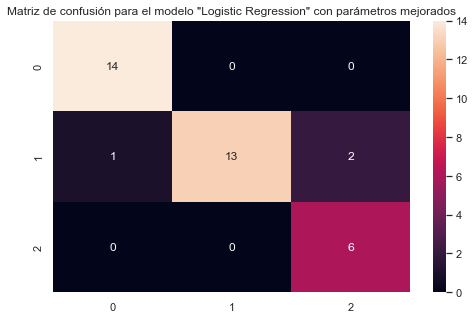

In [51]:
MC_log_reg_bp = confusion_matrix (y_test, y_pred_log_reg_bp)
sns.heatmap(MC_log_reg_bp, annot=True).set(title='Matriz de confusión para el modelo "Logistic Regression" con parámetros mejorados')

- El modelo "Logistic Regression" con parámetros mejorados, predice como falsos negativos valores de las clases 2 y 3, no se observan diferencias con el modelo sin mejorar los parámetros.

[Text(0.5, 1.0, 'Matriz de confusión para el modelo "Logistic Regression" con parámetros mejorados')]

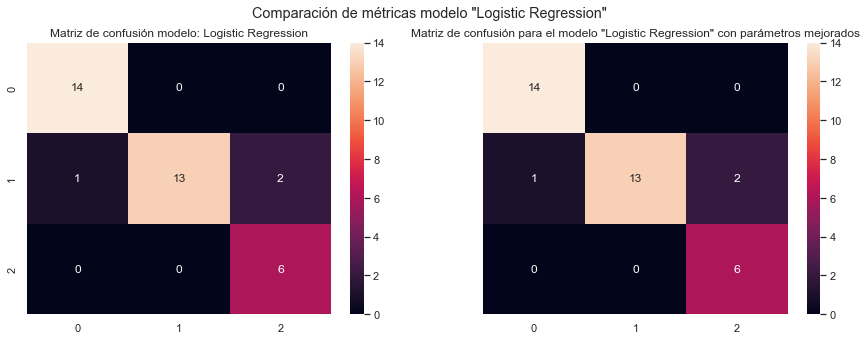

In [52]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
fig.suptitle('Comparación de métricas modelo "Logistic Regression" ')

# Logistic Regression
sns.heatmap(MC_log_reg,ax=axes[0], annot=True)
axes[0].set(title='Matriz de confusión modelo: Logistic Regression')


# Logistic Regression con parámetros mejorados'
sns.heatmap(MC_log_reg_bp, ax=axes[1], annot=True)
axes[1].set(title='Matriz de confusión para el modelo "Logistic Regression" con parámetros mejorados')



### Matriz de confusión  para el modelo "KNN"

[Text(0.5, 1.0, 'Matriz de confusión para el modelo "KNN" con parámetros mejorados')]

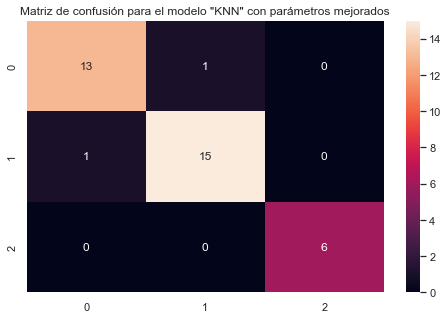

In [53]:
MC_KNN_bp = confusion_matrix (y_test, y_pred_KNN_bp)
sns.heatmap(MC_KNN_bp, annot=True).set(title='Matriz de confusión para el modelo "KNN" con parámetros mejorados')

- El modelo "KNN" con parámetros mejorados, predice como falsos negativos valores para las clases 1 y 2 pero se observa una disminución en los valores en comparació con el modelo sin mejorar los parámetros.

[Text(0.5, 1.0, 'Matriz de confusión para el modelo "KNN" con parámetros mejorados')]

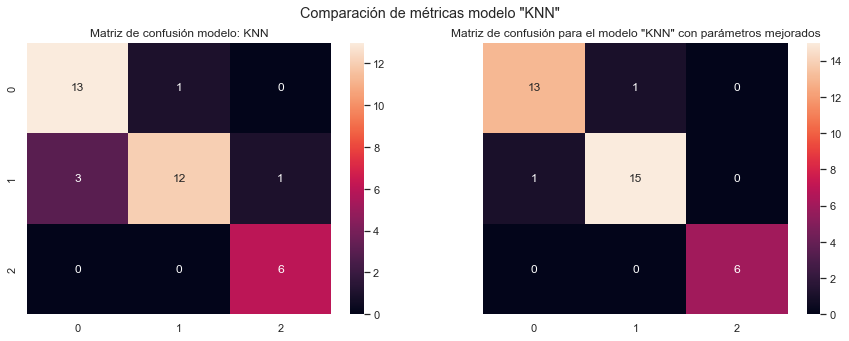

In [54]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
fig.suptitle('Comparación de métricas modelo "KNN" ')

# KNN
sns.heatmap(MC_KNN,ax=axes[0], annot=True)
axes[0].set(title='Matriz de confusión modelo: KNN')


# KNN con parámetros mejorados'
sns.heatmap(MC_KNN_bp, ax=axes[1], annot=True)
axes[1].set(title='Matriz de confusión para el modelo "KNN" con parámetros mejorados')

### Matriz de Confusión para el modelo "SVM"

[Text(0.5, 1.0, 'Matriz de confusión para el modelo "SVM" con parámetos mejorados')]

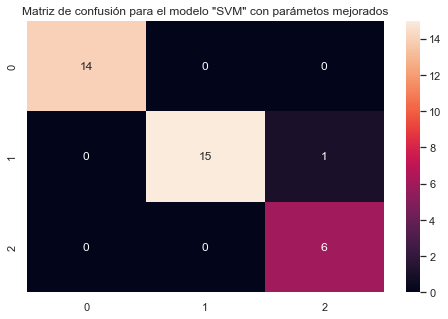

In [55]:
MC_SVM_bp = confusion_matrix (y_test, y_pred_SVM_bp)
sns.heatmap(MC_SVM_bp, annot=True).set(title='Matriz de confusión para el modelo "SVM" con parámetos mejorados')

- El modelo "SVM" con parámetros mejorados, predice sólo un valor como falso negativo para la clase 2.

[Text(0.5, 1.0, 'Matriz de confusión para el modelo "SVM" con parámetros mejorados')]

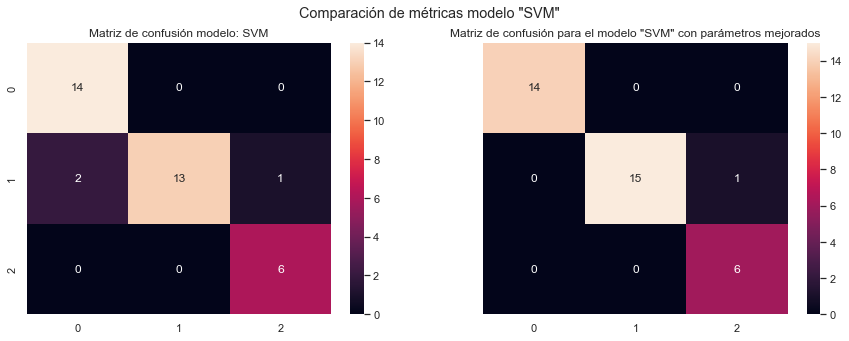

In [56]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
fig.suptitle('Comparación de métricas modelo "SVM" ')

# SVM
sns.heatmap(MC_SVM,ax=axes[0], annot=True)
axes[0].set(title='Matriz de confusión modelo: SVM')


# SVM con parámetros mejorados'
sns.heatmap(MC_SVM_bp, ax=axes[1], annot=True)
axes[1].set(title='Matriz de confusión para el modelo "SVM" con parámetros mejorados')

## Exercici 4
Compara el seu rendiment fent servir l’aproximació traint/test o cross-validation.






In [57]:
from sklearn.model_selection import cross_val_score

cv_log_reg = cross_val_score(log_reg, X, y, cv=5, scoring='f1_macro')
print('El F1 del modelo "Logistic Regression" con Cross Validation es: {:.2f}, con un std de: {:.2f}'.format(cv_log_reg.mean(), cv_log_reg.std()))

cv_log_reg_bp = cross_val_score(log_reg_bp, X, y, cv=5, scoring='f1_macro')
print('El F1 del modelo "Logistic Regression" con parámetros mejorados con Cross Validation es: {:.2f}, con un std de: {:.2f}'.format(cv_log_reg_bp.mean(), cv_log_reg_bp.std()))

cv_KNN = cross_val_score(KNN, X, y, cv=5, scoring='f1_macro')
print('El F1 del modelo "KNN" con Cross Validation es: {:.2f}, con un std de: {:.2f}'.format(cv_KNN.mean(), cv_KNN.std()))

cv_KNN_bp = cross_val_score(KNN_bp, X, y, cv=5, scoring='f1_macro')
print('El F1 del modelo "KNN" con parámetros mejorados con Cross Validation es: {:.2f}, con un std de: {:.2f}'.format(cv_KNN_bp.mean(), cv_KNN_bp.std()))


cv_SVM = cross_val_score(SVM, X, y, cv=5, scoring='f1_macro')
print('El F1 del modelo "SVM" con Cross Validation es: {:.2f}, con un std de: {:.2f}'.format(cv_SVM.mean(), cv_SVM.std()))

cv_SVM_bp = cross_val_score(SVM_bp, X, y, cv=5, scoring='f1_macro')
print('El F1 del modelo "SVM" con parámetros mejorados con Cross Validation es: {:.2f}, con un std de: {:.2f}'.format(cv_SVM_bp.mean(), 
                                                                                            cv_SVM_bp.std()))

El F1 del modelo "Logistic Regression" con Cross Validation es: 0.94, con un std de: 0.04
El F1 del modelo "Logistic Regression" con parámetros mejorados con Cross Validation es: 0.94, con un std de: 0.04
El F1 del modelo "KNN" con Cross Validation es: 0.85, con un std de: 0.08
El F1 del modelo "KNN" con parámetros mejorados con Cross Validation es: 0.83, con un std de: 0.04
El F1 del modelo "SVM" con Cross Validation es: 0.96, con un std de: 0.03
El F1 del modelo "SVM" con parámetros mejorados con Cross Validation es: 0.96, con un std de: 0.03


In [58]:
cv_log_reg = cv_log_reg.mean()
cv_log_reg_bp = cv_log_reg_bp.mean()
cv_KNN = cv_KNN.mean()
cv_KNN_bp = cv_KNN_bp.mean()
cv_SVM = cv_SVM.mean()
cv_SVM_bp = cv_SVM_bp.mean()

metrics = pd.DataFrame( data = [['Logistic Regression', acc_log_reg,f1_log_reg, cv_log_reg],
                                ['Logistic Regression', acc_log_reg_bp, f1_log_reg_bp, cv_log_reg_bp],
                                ['KNN', acc_KNN, f1_KNN, cv_KNN],
                                ['KNN BP', acc_KNN_bp, f1_KNN_bp, cv_KNN_bp],
                                [ 'SVM', acc_SVM, f1_SVM, cv_SVM],                                
                                ['SVM BP', acc_SVM_bp, f1_SVM_bp, cv_SVM_bp]],
                       columns = ['Modelo', 'Accuracy', 'F1', 'CV'])
metrics

,Modelo,Accuracy,F1,CV
0,Logistic Regression,0.916667,0.906404,0.940631
1,Logistic Regression,0.916667,0.906404,0.940631
2,KNN,0.861111,0.872443,0.848154
3,KNN BP,0.944444,0.955357,0.833162
4,SVM,0.916667,0.917654,0.961200
5,SVM BP,0.972222,0.963606,0.960681


Se ha realizado Cross Validation en todos los modelos previo a mejorar los parámetros y se observa lo siguiente:
- Para el modelo "Logistic Regression" no se observan diferencias en los resultados de CV para el modelo con y sin parámetros mejorados.
- Para el modelo "KNN" con parámetros mejorados se observa una disminución en el valor de CV, siendo este 0.833162.
- Para el modelo "SVM" con parámetros mejorados se observa una leve disminución en el valor de CV, siendo este 0.960681.

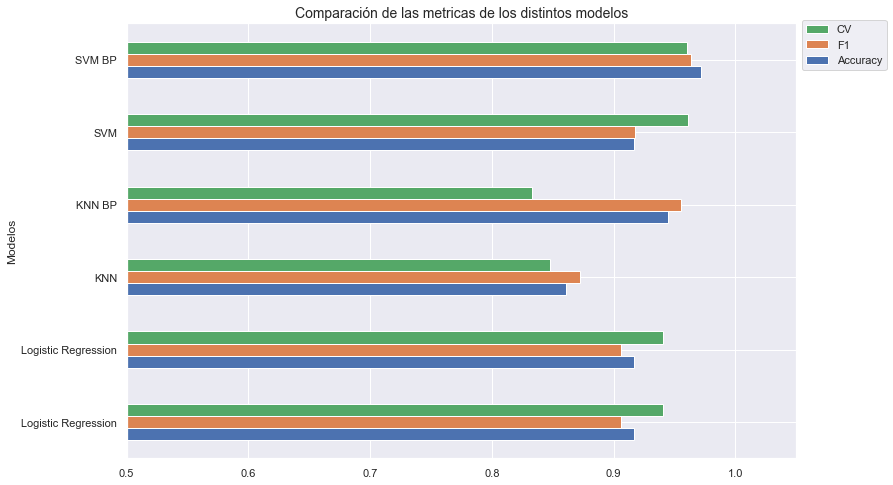

In [59]:
plot_metrics = metrics.set_index('Modelo')
ax = plot_metrics[['Accuracy', 'F1', 'CV']].plot(kind='barh', figsize=(12, 8))
ax.set_title('Comparación de las metricas de los distintos modelos', fontsize = 14)
ax.set_ylabel('Modelos')
ax.set_xlim([0.5, 1.05])
handles, labels = ax.get_legend_handles_labels()
ax.legend(reversed(handles), reversed(labels), loc='upper left', bbox_to_anchor=(1, 1.02))

- En el gráfico se puede observar que en todos los modelos empleados se obtienen buenas métricas. Sin embargo, tanto el método "KNN" como el "SVM" muestran métricas muy buenas, sobre todo tras la mejora de sus parámetros. El "SVM", sin embargo, se muestra un poco superior.

## Exercici 5
Aplica algun procés d'enginyeria per millorar els resultats (normalització, estandardització, mostreig...)

- Se ha realizado el preprocesado al inicio.

